# Big Mart Data
## by Fadia Saleh 

## Preliminary Wrangling

> This project investigate what is the most important factor that affect the price in big mart stores

> Starting with importing the libararies that will be used 

In [1]:
#First we have to load the data and import the libabries that we may use 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib as matplotlib
import warnings
warnings.filterwarnings("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#In this step Iam reading the set from the csv to the notebook using pandas
Big_Mart = pd.read_csv(r'C:\Users\FADIA\Downloads\Test.csv')

Big_Mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
#checking if the item identifier is unique or represents more than a item in the set 
Big_Mart['Item_Identifier'].nunique()

1543

In [4]:
#checking how unique each column
Big_Mart.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [5]:
#checking the null in the set 
Big_Mart.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### What is the structure of your dataset?

> number of columns 11
> number of rows 5681
> nulls in column item weight 976
> nulls in column Outlet_Size 1606
> total features are (Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type)

### What is/are the main feature(s) of interest in your dataset?

> (Item_Type,Item_Fat_Content,Item_MRP)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>(Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type)

## Cleaning Before Univariate Exploration


In [6]:
# I took a decision to delete the null values instead of deleting the most null columns cause i decided to use the 2 columns 
#so i created a new set called Big_Mart_2 represent the set without the nulls 
Big_Mart_2=Big_Mart.dropna()
Big_Mart_2.shape[0]

3099

In [7]:
#I figured out that there are different inputs in the column representing the same 2 words Regular and Low Fatso idecided to replace the wrong spelling 
list(Big_Mart_2['Item_Fat_Content'].value_counts().keys())

['Low Fat', 'Regular', 'LF', 'reg', 'low fat']

In [8]:
#replacing happening here 
Big_Mart_2["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat","reg":"Regular"}, inplace=True)
Big_Mart_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
13,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1
14,DRL59,16.750,Low Fat,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1


In [9]:
#checking the list of words in the column Outlet_Type
list(Big_Mart_2['Outlet_Type'].value_counts().keys())

['Supermarket Type1', 'Supermarket Type2']

In [10]:
#In here i decided to turn all teh set into small letters to be easy for me to work with it 
Big_Mart_2 = Big_Mart_2.applymap(lambda s:s.lower() if type(s) == str else s)
Big_Mart_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,fdw58,20.750,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,supermarket type1
5,fdh56,9.800,regular,0.063817,fruits and vegetables,117.1492,out046,1997,small,tier 1,supermarket type1
6,fdl48,19.350,regular,0.082602,baking goods,50.1034,out018,2009,medium,tier 3,supermarket type2
13,fdu11,4.785,low fat,0.092738,breads,122.3098,out049,1999,medium,tier 1,supermarket type1
14,drl59,16.750,low fat,0.021206,hard drinks,52.0298,out013,1987,high,tier 3,supermarket type1
...,...,...,...,...,...,...,...,...,...,...,...
5673,fdf46,7.070,low fat,0.094053,snack foods,116.0834,out018,2009,medium,tier 3,supermarket type2
5674,drl35,15.700,low fat,0.030704,hard drinks,43.2770,out046,1997,small,tier 1,supermarket type1
5675,fdw46,13.000,regular,0.070411,snack foods,63.4484,out049,1999,medium,tier 1,supermarket type1
5676,fdb58,10.500,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,supermarket type1


In [11]:
#i decided to rename the columns to shorter names so i can easily call it 
Big_Mart_2 = Big_Mart_2.rename(columns = {'Item_Identifier': 'item_identifier', 'Item_Weight': 'weight','Item_Fat_Content':'fat_content','Item_Visibility':'visibility',
                          'Item_Type':'item_type','Item_MRP':'max_retail_price','Outlet_Identifier':'outlet_identifier',
                         'Outlet_Establishment_Year':'outlet_establishment_year','Outlet_Size':'outlet_size','Outlet_Location_Type':'outlet_location_type','Outlet_Type':'outlet_type'}, inplace = False)
Big_Mart_2.head()
Big_Mart_2.reset_index(drop=True,inplace=True)

In [12]:
#decided to remove th eword supermarket 
Big_Mart_2["outlet_type"].replace({"supermarket type1": "type 1", "supermarket type2": "type 2"}, inplace=True)
Big_Mart_2.head()

,item_identifier,weight,fat_content,visibility,item_type,max_retail_price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,fdw58,20.750,low fat,0.007565,snack foods,107.8622,out049,1999,medium,tier 1,type 1
1,fdh56,9.800,regular,0.063817,fruits and vegetables,117.1492,out046,1997,small,tier 1,type 1
2,fdl48,19.350,regular,0.082602,baking goods,50.1034,out018,2009,medium,tier 3,type 2
3,fdu11,4.785,low fat,0.092738,breads,122.3098,out049,1999,medium,tier 1,type 1
4,drl59,16.750,low fat,0.021206,hard drinks,52.0298,out013,1987,high,tier 3,type 1


In [13]:
#checking if there are any duplicats the answer is no :) 
Big_Mart_2.duplicated().sum()

0

## Univariate Exploration

> In this section, I'll start by looking at the distribution of the main variable of interest which is item type.



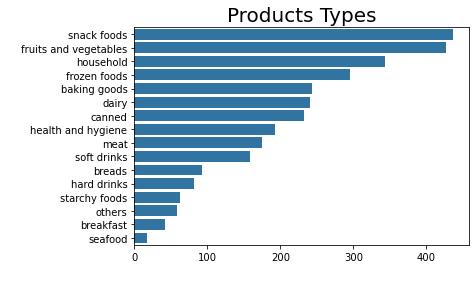

In [14]:
#preparing the column item type to show it by count order 
item_order= Big_Mart_2['item_type'].value_counts().index
#this line to make sure that the color will be same color 
Base_color=sns.color_palette()[0]
#the count plot to show all the items that BigMart sell 
sns.countplot(data=Big_Mart_2, y='item_type',color=Base_color,order=item_order);
#plt.xticks(rotation =90);
plt.title('Products Types', fontsize=20);
plt.ylabel(' ');
plt.xlabel(' ');

> here i found that that i have 16 item type and the most existed one is the snack foods.

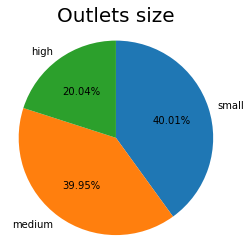

In [15]:
# the pie chart to show the count of different outlet sizes
outlet_size= Big_Mart_2['outlet_size'].value_counts()

plt.pie(outlet_size, labels = outlet_size.index, startangle = 90, counterclock = False, autopct="%0.2f%%");
plt.title('Outlets size', fontsize=20);

plt.axis('square');

> in this chart I found that big mart prefer establishing small and medium stores more than high or in other words large stores  

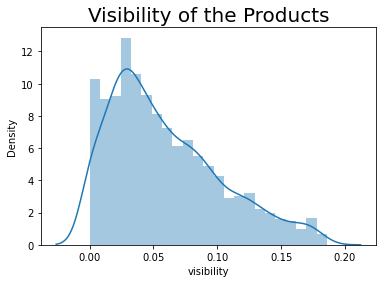

In [16]:
#in the store each item type has a float number represent its place to be visable in the store in this visual i checking 
#how the visibality distributs on the market and how high it can get for a product to be visiable and how low 
sns.distplot(Big_Mart_2['visibility']);
plt.title('Visibility of the Products', fontsize=20);


>in here I am  looking at the distribution of the visibility of the products in the stores

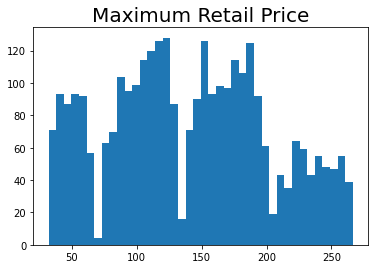

In [17]:
#in here i am checking the maxiuam retail price and how high it can get to 
plt.hist(data = Big_Mart_2, x = 'max_retail_price', bins = 40);
plt.title('Maximum Retail Price',fontsize=20);

> in here i am checking what is the highest price that product can be 

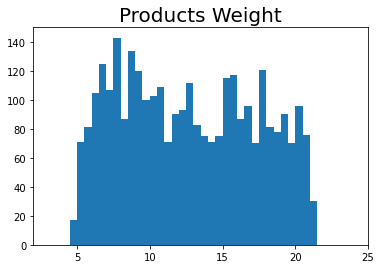

In [18]:
#in here i am checking the weight of a product and how high it can get to 

bins=np.arange(0,Big_Mart_2['weight'].max()+0.5,0.5)
plt.hist(data=Big_Mart_2,x="weight",bins=bins);
plt.xlim((2,25));
plt.title('Products Weight',fontsize=20);

> > in here i am checking the highest weight for a product 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the snacks food in the item type column are more than 400 different type of snack on the store, and the maxiuam retail price for an item in the store is between 100 and 120, I don't think any transformation will be much needed but what i have done is removing the nulls.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i made a replacement to both columns (outlet type, and fat content column) as well as changing all the columns names to make sure its understanded by any one who will read it 

## Bivariate Exploration

> In this section, I will check if there any relation between different variables 

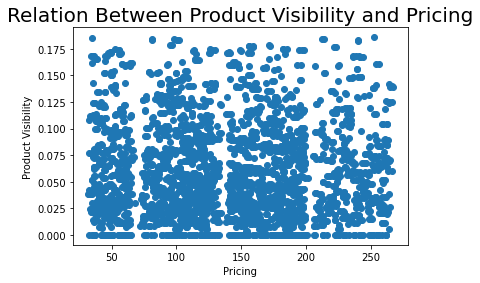

In [19]:
#in this part i decided to check the relation and correlations between 2 different columns 
#for examle in here i am checking if there is any relation between teh price and the product visibility 
plt.scatter(data=Big_Mart_2 , y ='visibility', x ='max_retail_price');
plt.title('Relation Between Product Visibility and Pricing',fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Product Visibility');

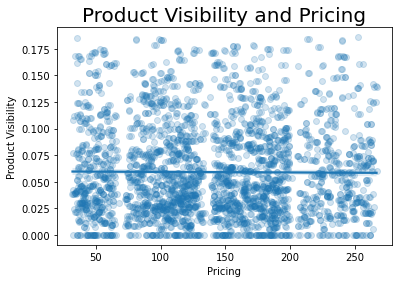

In [20]:
#I used the regrassion plot to understand the relation between the mention columns 
sns.regplot(data=Big_Mart_2 , y ='visibility', x ='max_retail_price', x_jitter=0.3,scatter_kws=({'alpha':1/5}));
plt.title('Product Visibility and Pricing',fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Product Visibility');

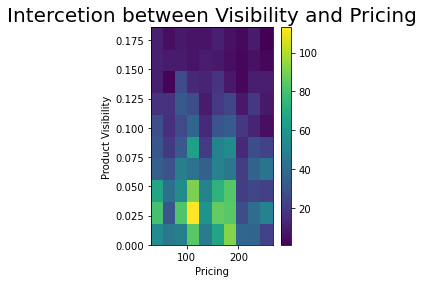

In [21]:
#hist 2d fuction to describe the intersection between max_retail_price and visibility
plt.subplot(1, 2, 2)
plt.hist2d(data = Big_Mart_2, x = 'max_retail_price', y = 'visibility',cmin=0.5)
plt.colorbar()
plt.title('Intercetion between Visibility and Pricing',fontsize=20);
plt.xlabel('Pricing');
plt.ylabel('Product Visibility');

> from this chart i am trying to know if the prices goes up when the product visibality increase but it doesn't seem to be the case as most of the high prices go to the visibality points 0.025 to 0.100

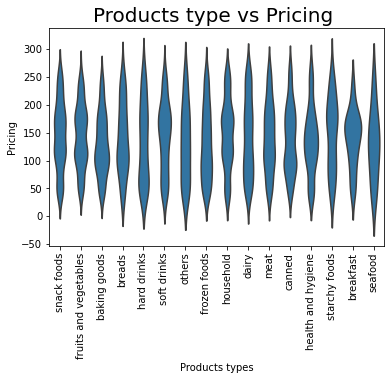

In [22]:
#violin plot to to show the the higer pricing for the item type 
color_base=sns.color_palette()[0]
sns.violinplot(data=Big_Mart_2,y='max_retail_price',x='item_type',color=color_base,inner=None);
plt.xticks(rotation=90);
plt.title('Products type vs Pricing ',fontsize=20);
plt.xlabel('Products types');
plt.ylabel('Pricing');

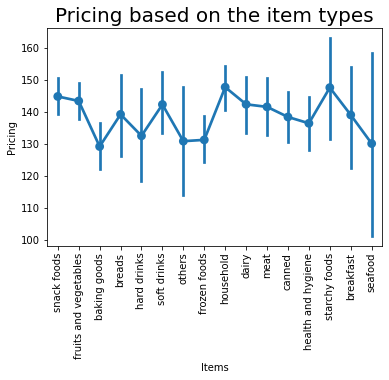

In [23]:
#point plot used to describe the expenseive products 
color_base=sns.color_palette()[0]
sns.pointplot(data=Big_Mart_2,y='max_retail_price',x='item_type', color=color_base,dodge=True);
plt.xticks(rotation=90);
#color_base=sns.color_palette()[0]
#sns.pointplot(data=Big_Mart_2,y='max_retail_price',x='item_type', color=color_base,linestyles=" ",dodge=True);
#plt.xticks(rotation=90);
plt.title('Pricing based on the item types', fontsize=20);
plt.xlabel('Items');
plt.ylabel('Pricing');

> in these charts while I am trying to figure out the relation between the price and the products types, I found that although snacks into the products is the biggest product numbers but the higest price is seafood and starchy food  

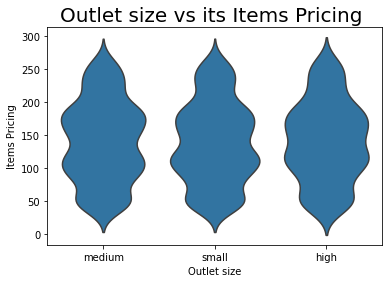

In [24]:
#vilon plot to show the most outlets lies in wish size 
color_base=sns.color_palette()[0]
sns.violinplot(data=Big_Mart_2,y='max_retail_price',x='outlet_size',color=color_base,inner=None);
plt.title('Outlet size vs its Items Pricing ',fontsize=20);
plt.xlabel('Outlet size');
plt.ylabel('Items Pricing');

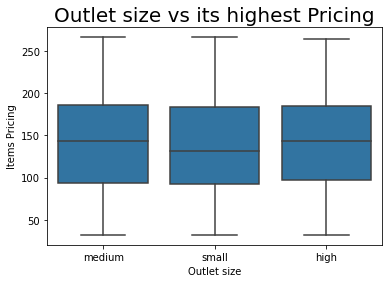

In [25]:
#the boxplot is to answer is the pricing get affected by the size of the outlet
color_base=sns.color_palette()[0]
sns.boxplot(data=Big_Mart_2,y='max_retail_price',x='outlet_size',color=color_base);
plt.title('Outlet size vs its highest Pricing',fontsize=20);
plt.xlabel('Outlet size');
plt.ylabel('Items Pricing');

> in here I found that the price i not affected that much by the size of the outlets 

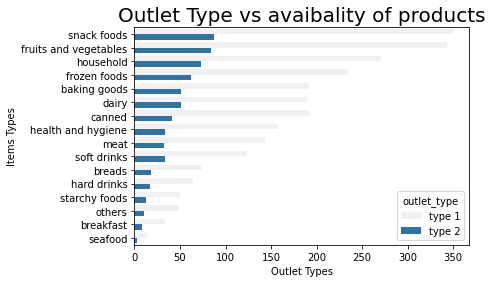

In [26]:
#big mart intersted to put more products to  thier super market into type 1 more than type 2
Base_color=sns.color_palette()[0]
sns.countplot(data=Big_Mart_2, y='item_type',color=Base_color,order=item_order, hue='outlet_type');
plt.title('Outlet Type vs avaibality of products',fontsize=20);
plt.xlabel('Outlet Types');
plt.ylabel('Items Types');

> Big mart divided its stores whatever the size into types 1 and 2 so this chart show that big mart prefer to establish type 1 more than type 2

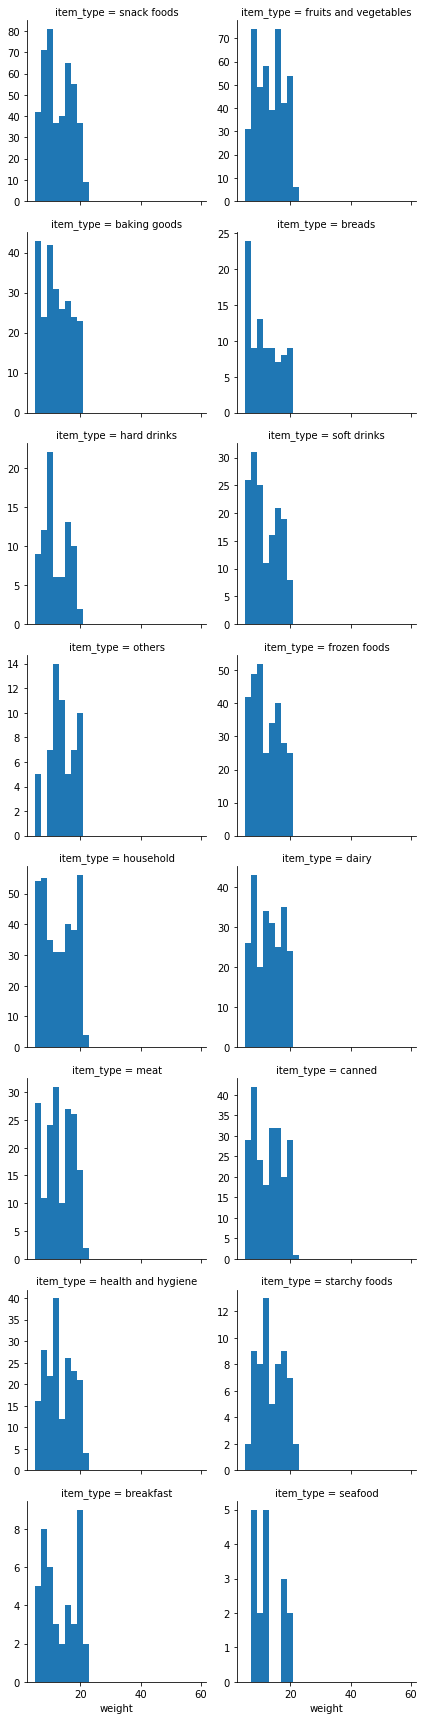

In [27]:
##in here i am showing the weight for each item type product accross the data 
bins = np.arange(5, 58+2, 2)

g = sns.FacetGrid(data = Big_Mart_2, col = 'item_type',col_wrap=2, sharey=False);

g.map(plt.hist,'weight',bins=bins);

> Chart to show the variance between teh weight for each prduct 

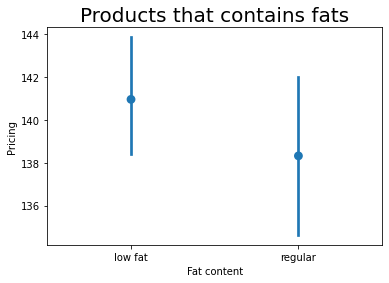

In [28]:
#chart to show the relation between fat content products and its pricing 
color_base=sns.color_palette()[0]
sns.pointplot(data=Big_Mart_2,y='max_retail_price',x='fat_content', color=color_base,linestyles=" ",dodge=True);
plt.title('Products that contains fats', fontsize=20);
plt.xlabel('Fat content');
plt.ylabel('Pricing');

> the fat content affect the pricing 

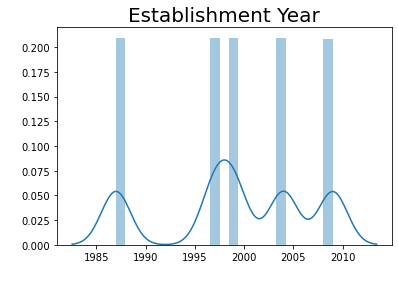

In [29]:
#displot to describe the most years that bigmart establish their outlet in it 
sns.distplot(Big_Mart_2['outlet_establishment_year']);
plt.title('Establishment Year', fontsize=20);
plt.xlabel(' ');
plt.ylabel(' ');

>BigMart golden establisment years was between 1995 till 2000 

### Talk about some of the relationships you observed in this part of the investigation. 

> Product type affect the price as shown in the chart pricing based on item type also low fat content products afttect the price 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> in this phase the most clear relationship is between item type and pricing, and the visibility of the product and pricing seems to have an intersetion point in 0.025 to 0.100 of the visibality points, its really interesting to dig deep into the at content column and to understand weather the price always goes up when its low fat or some of the products are vice versa

## Multivariate Exploration

> In this section, I'll start by looking at the distribution of 3 variable together.


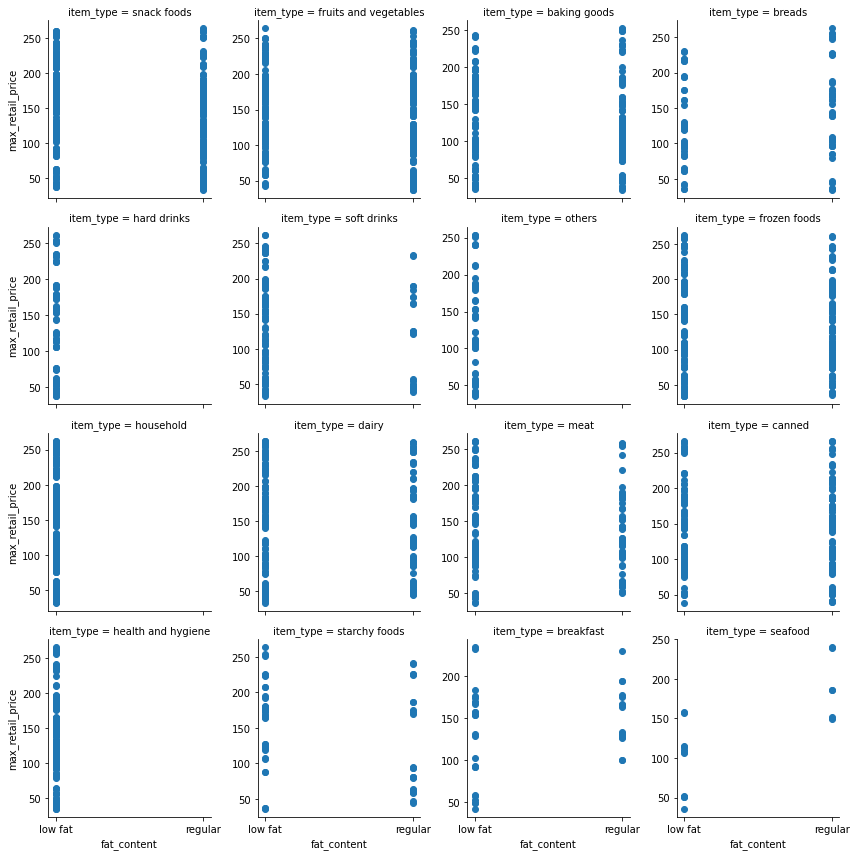

In [30]:
#checking the effect of the fat content product on price per each product 
g = sns.FacetGrid(data = Big_Mart_2, col = 'item_type', col_wrap=4, sharey=False,margin_titles=True)
g.map(plt.scatter,'fat_content','max_retail_price');

> in this chart i found out that the low fat products is higher price that the regular fat 

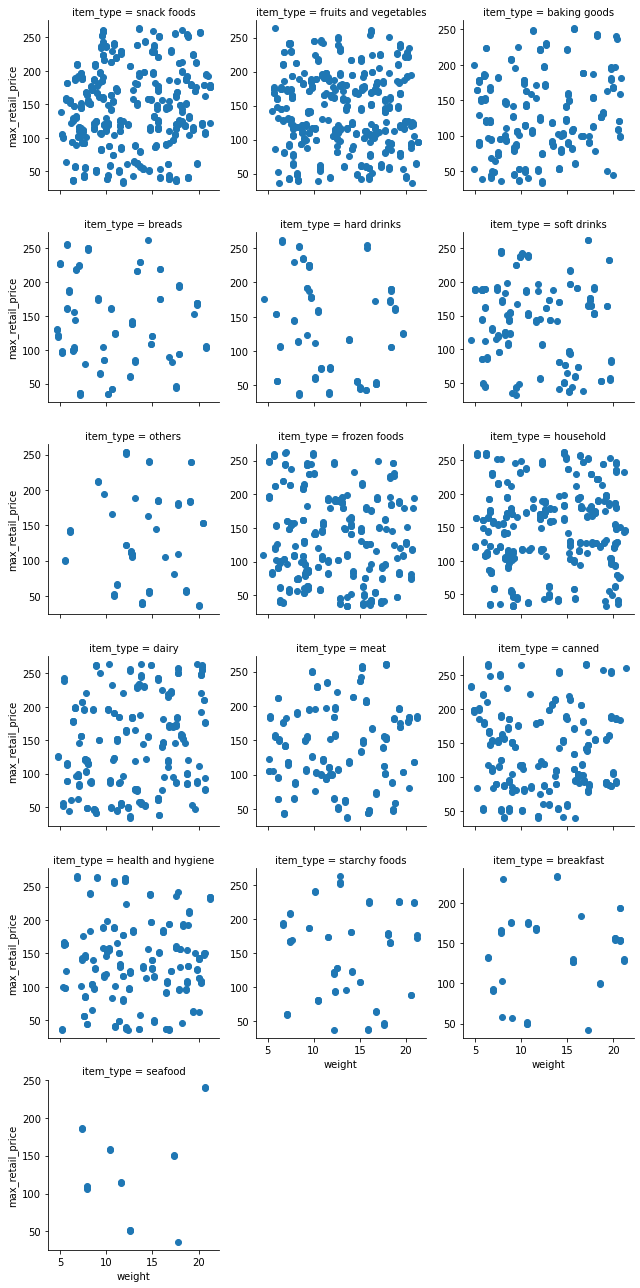

In [31]:
#in this part i am exploring the data by showing the patterns between more than columns together 
#in here i am checking if there any effect on the price cased by the weight and item together 
g = sns.FacetGrid(data = Big_Mart_2, col = 'item_type', col_wrap=3, sharey=False,margin_titles=True)
g.map(plt.scatter, 'weight','max_retail_price');

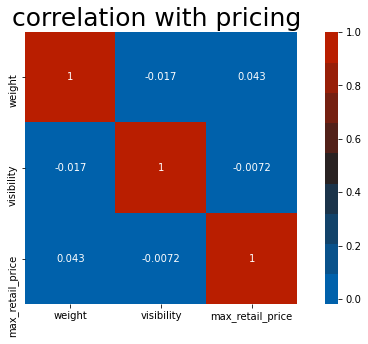

In [32]:
#checking if there correlation between data 
f, ax = plt.subplots(figsize=(10, 5))
corr = Big_Mart_2.drop(['item_identifier','fat_content','outlet_identifier','outlet_establishment_year','outlet_location_type','outlet_type'], axis=1).corr()
#matplotlib.rcParams.update({'font.size': 15})
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, s=105, l=40, n=9, center="dark"), square=True, ax=ax, annot = True)
mp.set_title(label='correlation with pricing ', fontsize=25);

> in this part I figured out that the weight and visibality of the product doesn't affect the price of the item 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a clear relationship between Maxiuam retail price, product type and the fat content of each product 
### Were there any interesting or surprising interactions between features?

> yes, as low the fats in the products the high its price, that was intersting conclusion 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [33]:
Big_Mart_2.to_csv("Big_Mart_after_cleaning.csv", index=False)